# Graded Challenge 7 Phase 2 - Computer Vision - Inference
- Name: Gilbert Kurniawan H
- Batch: RMT 026
- Objective: In this notebook, we will be doing model inference to test the model from our previous notebook.

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files

import warnings
import pickle
warnings.filterwarnings('ignore')

# Model Loading

In [2]:
# load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/P2G7_gilbert_kurniawan_model/model_tf_fix.h5')

# Model Inference

In [3]:
img_height= 300
img_width= 300
batch_size= 32

with open('/content/drive/MyDrive/Colab Notebooks/P2G7_gilbert_kurniawan_model/classes.txt', 'r') as file:
    class_names = [line.strip() for line in file]

In [4]:
def predict_uploaded_images(model, class_names, img_height=300, img_width=300):
    uploaded = files.upload()

    for fn in uploaded.keys():
        path = fn
        img = tf.keras.utils.load_img(path, target_size=(img_height, img_width))
        plt.imshow(img)
        plt.axis('Off')
        plt.show()

        x = tf.keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        # Make predictions
        probabilities = model.predict(images)
        print(probabilities)
        predicted_class_idx = np.argmax(probabilities)
        print(predicted_class_idx)

        # Display the top predicted class and its probability
        predicted_class = class_names[predicted_class_idx]
        predicted_prob = probabilities[0, predicted_class_idx]
        print(f"Predicted class: {predicted_class} - Probability: {predicted_prob:.4f}")


## Single Bag Test

Saving A_typical_black_bin_bag_from_the_UK_20060811.jpg to A_typical_black_bin_bag_from_the_UK_20060811.jpg


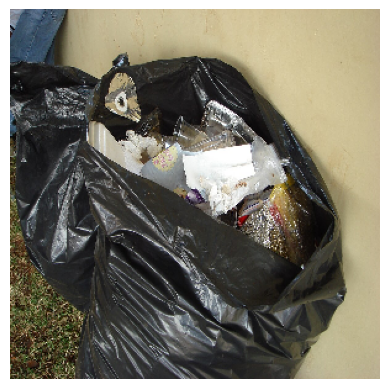

1/1 [==============================] - 1s 1s/step
[[9.9999976e-01 4.7422228e-13 1.8104208e-07]]
0
Predicted class: Garbage Bag Images - Probability: 1.0000


In [5]:
# Garbage Bag

predict_uploaded_images(model, class_names)

Saving Paper-Bag1-3-1.jpeg to Paper-Bag1-3-1.jpeg


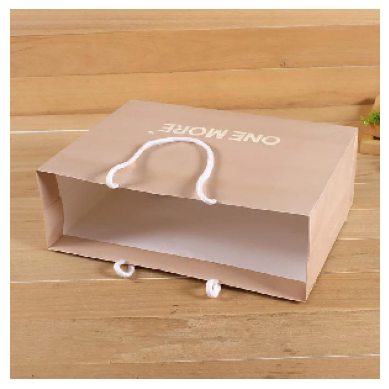

1/1 [==============================] - 0s 342ms/step
[[3.0023730e-09 9.9997175e-01 2.8226781e-05]]
1
Predicted class: Paper Bag Images - Probability: 1.0000


In [6]:
# Paper Bag

predict_uploaded_images(model, class_names)

Saving 275168047.jpg to 275168047.jpg


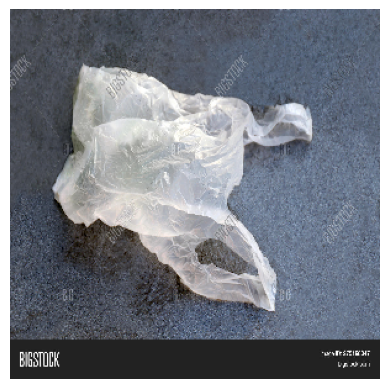

1/1 [==============================] - 0s 312ms/step
[[1.760113e-03 4.881515e-04 9.977518e-01]]
2
Predicted class: Plastic Bag Images - Probability: 0.9978


In [7]:
# Plastic Bag

predict_uploaded_images(model, class_names)

## Multiple Bag Test

Saving single-use-plastic-ban-featured-image-810x608-1.jpg to single-use-plastic-ban-featured-image-810x608-1 (1).jpg


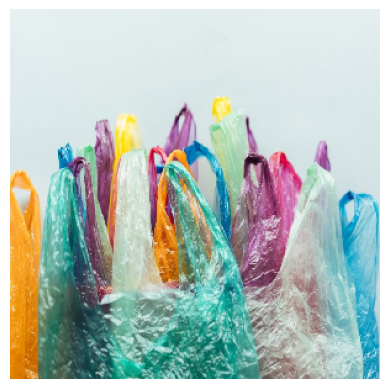

1/1 [==============================] - 0s 332ms/step
[[2.5887809e-06 1.2852118e-07 9.9999726e-01]]
2
Predicted class: Plastic Bag Images - Probability: 1.0000


In [8]:
predict_uploaded_images(model, class_names)

## Combination Check

Saving test_image.jpg to test_image (1).jpg


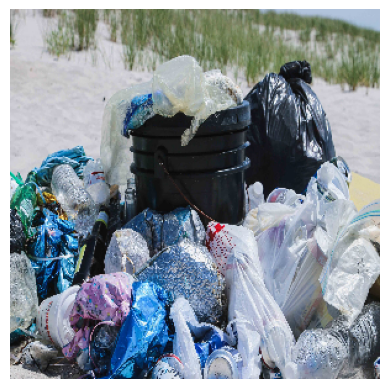

1/1 [==============================] - 0s 347ms/step
[[9.9976581e-01 5.9644040e-11 2.3421666e-04]]
0
Predicted class: Garbage Bag Images - Probability: 0.9998


In [9]:
predict_uploaded_images(model, class_names)